In [1]:
#Importing Main Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing The Dataset Downloaded From Kaggle
data_train = pd.read_csv("/home/kanax/Desktop/ML_Projects/train.csv")
data_test = pd.read_csv("/home/kanax/Desktop/ML_Projects/test.csv")

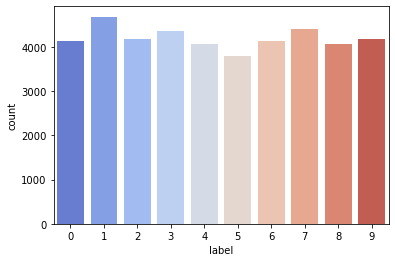

In [3]:
#Checking For Imbalance In The Training Set
y_train = data_train["label"]
X_train = data_train.drop(labels = ["label"],axis = 1) 

sns.countplot(y_train,palette='coolwarm');

In [4]:
#Checking For Null-Values In The Training Set
set(list(X_train.isnull().all()))

{False}

In [5]:
#Normalizing Our Pixel Values
print("The pixel values range from %d to %d" %(min(X_train.iloc[0]), max(X_train.iloc[0])))

The pixel values range from 0 to 255


In [6]:
X_train = (X_train)/255.0

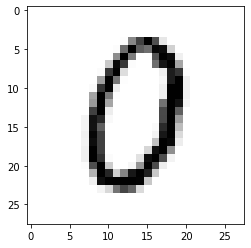

In [7]:
#Reshaping Our Feature Vector To See The Images
X_train = X_train.values.reshape(-1,28,28,1)
g = plt.imshow(X_train[5][:,:,0],cmap='Greys')

In [8]:
#One Hot Encoding The Training Results
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, num_classes = 10)

In [9]:
#Splitting The Training Dataset To Obtain A Validation Split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1)

In [10]:
#Building A CNN Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [11]:
#Defining An Optimizer
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [12]:
#Compiling The Model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [13]:
#Defining A Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [14]:
#Fitting The Model
epochs, batch_size = 10, 86
model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_val, y_val), verbose = 2)

Epoch 1/10
440/440 - 89s - loss: 0.2381 - accuracy: 0.9241 - val_loss: 0.0573 - val_accuracy: 0.9800 - 89s/epoch - 202ms/step
Epoch 2/10
440/440 - 88s - loss: 0.0752 - accuracy: 0.9772 - val_loss: 0.0512 - val_accuracy: 0.9836 - 88s/epoch - 200ms/step
Epoch 3/10
440/440 - 99s - loss: 0.0538 - accuracy: 0.9834 - val_loss: 0.0385 - val_accuracy: 0.9876 - 99s/epoch - 224ms/step
Epoch 4/10
440/440 - 106s - loss: 0.0482 - accuracy: 0.9861 - val_loss: 0.0320 - val_accuracy: 0.9886 - 106s/epoch - 242ms/step
Epoch 5/10
440/440 - 93s - loss: 0.0398 - accuracy: 0.9888 - val_loss: 0.0471 - val_accuracy: 0.9864 - 93s/epoch - 211ms/step
Epoch 6/10
440/440 - 93s - loss: 0.0371 - accuracy: 0.9893 - val_loss: 0.0259 - val_accuracy: 0.9910 - 93s/epoch - 210ms/step
Epoch 7/10
440/440 - 93s - loss: 0.0336 - accuracy: 0.9903 - val_loss: 0.0648 - val_accuracy: 0.9852 - 93s/epoch - 212ms/step
Epoch 8/10
440/440 - 94s - loss: 0.0310 - accuracy: 0.9909 - val_loss: 0.0366 - val_accuracy: 0.9905 - 94s/epoch - 2

In [15]:
#Deploying Gradio Applet
import gradio as gr
labels = [str(i) for i in range(0,10)]
def predict_shape(img):
    img = img/255.0
    preds = model.predict(img.reshape(-1, 28, 28, 1))[0]
    return {label: float(pred) for label, pred in zip(labels, preds)}


output = gr.outputs.Label(num_top_classes=2)
input = gr.inputs.Image(image_mode='L', 
                        source='canvas', 
                        shape=(28, 28), 
                        invert_colors=True, 
                        tool= 'select')

title="Digit prediction app"
description="A Convolution Neural Network model trained on MNST dataset." \

gr.Interface(fn = predict_shape,
             inputs = input, 
             outputs = output, 
             live = True, 
             title=title,
             description = description,
             capture_session=True).launch()

Running on local URL:  http://127.0.0.1:7861/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x7fbd03702160>,
 'http://127.0.0.1:7861/',
 None)